In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm as cm
from matplotlib.colors import LogNorm
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
from tqdm import tqdm
import glob




In [2]:
name = dict({"Bolivar_Valledupar": "Bolivar - Valledupar",
             "Briceno_Tunja_Sogamoso": "Briceño - Tunja - Sogamoso",
             "Cienaga_San_Roque": "Cienaga - San Roque"})

In [36]:
len(df[df["Road_right"] == "Bolivar_Valledupar"]) / 1155610

0.0769273370773877

In [38]:
len(df[df["Road_right"] == "Briceno_Tunja_Sogamoso"]) / 1155610

0.8167928626439716

In [37]:
len(df[df["Road_right"] == "Cienaga_San_Roque"]) / 1155610

0.10627980027864072

In [35]:
df = pd.read_csv("outputs/df_in_buffer.csv")
df = df[df["device_id"].notna()]
df["local_location_at"] = df["local_location_at"].astype("datetime64")
df['date_ts'] = df['local_location_at'].apply(lambda dt: datetime(dt.year, dt.month, dt.day))
df = df[df["speed"].notna()]
df['date_1h'] = df['local_location_at'].apply(lambda dt: datetime(dt.year, dt.month, dt.day, dt.hour ))
df["hourTimeStamp"] = df["date_1h"].dt.hour
# df["dayTimeStamp"] = df["local_location_at"].dt.day
df

/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,device_id,platform,timestamp,local_location_at,latitude,longitude,iso_region,horizontal_accuracy,...,START_X,START_Y,END_X,END_Y,ID_1,Area,location_dt,date_ts,date_1h,hourTimeStamp
0,104,759,d581a938c7c2b0b201d6d5cc2b5775adc6f22265e1826b...,AAID,2022-04-21 12:54:01+00:00,2022-04-21 07:54:01,5.765943,-72.971240,CO-BOY,1.4,...,-72.939896,5.753012,-72.972518,5.768947,196,37469.780716,NaN,2022-04-21,2022-04-21 07:00:00,7
1,43545,4991,b12fe89c72dd75edc71cf448683103a077ef24026648bb...,AAID,2022-04-21 23:53:55+00:00,2022-04-21 18:53:55,5.756564,-72.967430,CO-BOY,5.7,...,-72.939896,5.753012,-72.972518,5.768947,196,37469.780716,NaN,2022-04-21,2022-04-21 18:00:00,18
2,45689,10019,418a934d5f49cd24052757575f540610cd316e39bfd710...,IDFA,2022-04-21 21:59:45+00:00,2022-04-21 16:59:45,5.767820,-72.972010,CO-BOY,4.7,...,-72.939896,5.753012,-72.972518,5.768947,196,37469.780716,NaN,2022-04-21,2022-04-21 16:00:00,16
3,120887,6885,8656073075e8ff9cc53459694fdd7c5fb54074bdcf1864...,AAID,2022-04-21 21:17:08+00:00,2022-04-21 16:17:08,5.762593,-72.969930,CO-BOY,1.9,...,-72.939896,5.753012,-72.972518,5.768947,196,37469.780716,NaN,2022-04-21,2022-04-21 16:00:00,16
4,135658,6209,1b82761fe0aeb548f1643cc57a3f0ba81917f881488f5d...,AAID,2022-04-21 12:29:08+00:00,2022-04-21 07:29:08,5.751986,-72.962540,CO-BOY,1.5,...,-72.939896,5.753012,-72.972518,5.768947,196,37469.780716,NaN,2022-04-21,2022-04-21 07:00:00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193845,1257412,2230,f7cca1c4d8d071e7f53f3c24a17328a886c5c9e5ef5541...,AAID,2022-01-02 19:20:59+00:00,2022-01-02 14:20:59,9.393563,-73.539290,CO-CES,9.9,...,-73.532785,9.370922,-73.545969,9.416322,54,39490.927703,2022-01-02,2022-01-02,2022-01-02 14:00:00,14
1193846,1339771,881,f7cca1c4d8d071e7f53f3c24a17328a886c5c9e5ef5541...,AAID,2022-01-02 19:21:46+00:00,2022-01-02 14:21:46,9.384047,-73.536480,CO-CES,9.9,...,-73.532785,9.370922,-73.545969,9.416322,54,39490.927703,2022-01-02,2022-01-02,2022-01-02 14:00:00,14
1193847,1222344,1884,752972f0e240d8c8af1eda7c31415f7a23b6b0692e849a...,AAID,2022-01-02 20:26:27+00:00,2022-01-02 15:26:27,10.083408,-73.732540,CO-CES,4.0,...,-73.732051,10.084953,-73.733225,10.081255,333,5911.769890,2022-01-02,2022-01-02,2022-01-02 15:00:00,15
1193848,1326618,2118,e2ae6e4f8d11dd2b378e53a95d3c44533cdac232498c5c...,AAID,2022-01-02 16:16:46+00:00,2022-01-02 11:16:46,9.867915,-74.563240,CO-MAG,3.8,...,-74.574498,9.873062,-74.555263,9.862772,246,19540.767922,2022-01-02,2022-01-02,2022-01-02 11:00:00,11


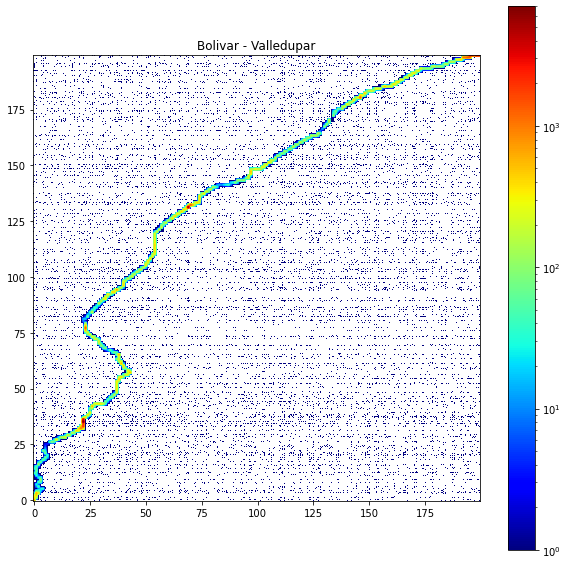

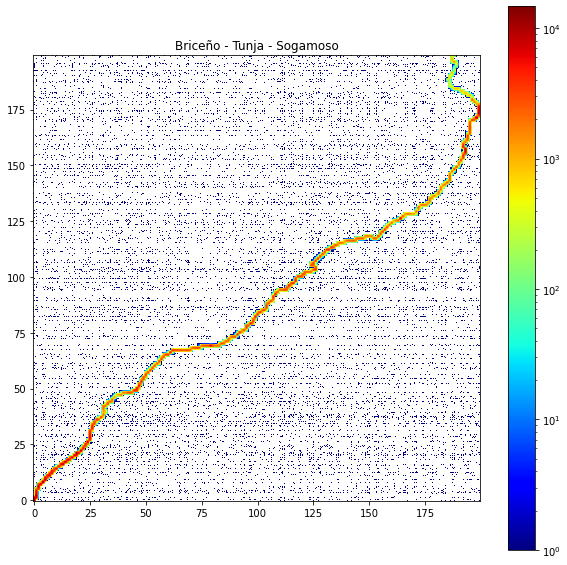

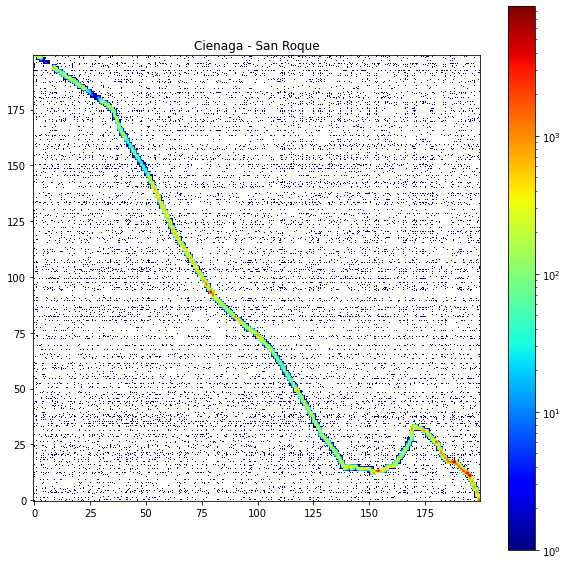

['Bolivar_Valledupar' 'Cienaga_San_Roque']


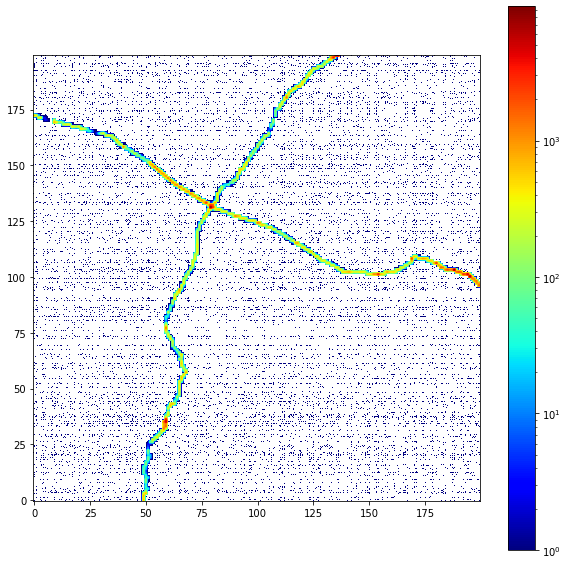

In [43]:
# df_tunja = df[df["Road_right"] == "Briceno_Tunja_Sogamoso"]
for k in name.keys():
    df_tunja = df[df["Road_right"] == k]


    heatmap, xedges, yedges = np.histogram2d(df_tunja["latitude"],df_tunja["longitude"], bins= (200,200))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.figure(figsize=(10,10))
    plt.clf()
    plt.title(name[k])
    plt.imshow(heatmap.T, origin='lower', norm=LogNorm(), cmap=cm.jet)
    plt.colorbar()
    plt.show()
                 
df_tunja = df[(df["Road_right"] == "Bolivar_Valledupar") | (df["Road_right"] == "Cienaga_San_Roque")]
print(df_tunja["Road_right"].unique())

heatmap, xedges, yedges = np.histogram2d(df_tunja["latitude"],df_tunja["longitude"], bins= (200,200))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10,10))
plt.clf()
plt.imshow(heatmap.T, origin='lower', norm=LogNorm(), cmap=cm.jet)
plt.colorbar()
plt.show()    

In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'device_id', 'platform', 'timestamp',
       'local_location_at', 'latitude', 'longitude', 'iso_region',
       'horizontal_accuracy', 'speed', 'user_agent', 'carrier', 'device_model',
       'geometry', 'id_left', 'Country_left', 'Road_left', 'index_right',
       'id_right', 'Country_right', 'Road_right', 'Length', 'START_X',
       'START_Y', 'END_X', 'END_Y', 'ID_1', 'Area', 'location_dt', 'date_ts',
       'date_1h', 'hourTimeStamp'],
      dtype='object')

In [10]:
fechas = sorted(glob.glob("../../outlogic_allcorridors/2022*"))
fechas = [i[-33:-23] for i in fechas]
fechas

['2022-01-01',
 '2022-01-02',
 '2022-01-03',
 '2022-01-04',
 '2022-01-05',
 '2022-01-06',
 '2022-01-07',
 '2022-01-08',
 '2022-01-09',
 '2022-01-10',
 '2022-01-11',
 '2022-01-12',
 '2022-01-13',
 '2022-01-14',
 '2022-01-15',
 '2022-01-16',
 '2022-01-17',
 '2022-01-18',
 '2022-01-19',
 '2022-01-20',
 '2022-01-21',
 '2022-01-22',
 '2022-01-23',
 '2022-01-24',
 '2022-01-25',
 '2022-01-26',
 '2022-01-27',
 '2022-01-28',
 '2022-01-29',
 '2022-01-30',
 '2022-01-31',
 '2022-02-01',
 '2022-02-02',
 '2022-02-03',
 '2022-02-04',
 '2022-02-05',
 '2022-02-06',
 '2022-02-07',
 '2022-02-08',
 '2022-02-09',
 '2022-02-10',
 '2022-02-11',
 '2022-02-12',
 '2022-02-13',
 '2022-02-14',
 '2022-02-15',
 '2022-02-16',
 '2022-02-17',
 '2022-02-18',
 '2022-02-19',
 '2022-02-20',
 '2022-02-21',
 '2022-02-22',
 '2022-02-23',
 '2022-02-24',
 '2022-02-25',
 '2022-02-26',
 '2022-02-27',
 '2022-02-28',
 '2022-03-01',
 '2022-03-02',
 '2022-03-03',
 '2022-03-04',
 '2022-03-05',
 '2022-03-06',
 '2022-03-07',
 '2022-03-

In [11]:
fechas_posibles = dict({})
for k in df["Road_right"].unique():
    print(k)
    fechas_posibles[k] = []
    max_val = 0
    for f in fechas:
        df_k = df[(df["Road_right"] == k) & (df["date_ts"] == f)]
        # display(df_k)
        num_hour_data = len(df_k["hourTimeStamp"].unique())
        if num_hour_data > max_val:
            max_val = num_hour_data
                
        if num_hour_data == 24:
            fechas_posibles[k].append(f)
    print(max_val)

Briceno_Tunja_Sogamoso
24
Bolivar_Valledupar
24
Cienaga_San_Roque
24


In [12]:
fechas_posibles["Bolivar_Valledupar"]

['2022-01-25',
 '2022-02-04',
 '2022-02-26',
 '2022-03-18',
 '2022-04-01',
 '2022-04-16',
 '2022-04-17']

In [13]:
df[(df["Road_right"] == "Bolivar_Valledupar") & (df["date_ts"] == "2022-02-04")]["hourTimeStamp"].unique()

array([20, 19, 22, 21, 23,  7, 10, 11,  3, 15, 17, 14,  8, 13, 12,  9,  0,
       18,  5, 16,  6,  4,  2,  1])

<AxesSubplot:>

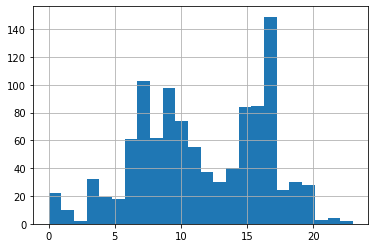

In [14]:
df[(df["Road_right"] == "Bolivar_Valledupar") & (df["date_ts"] == "2022-02-04")]["hourTimeStamp"].hist(bins = 24)

2022-01-03


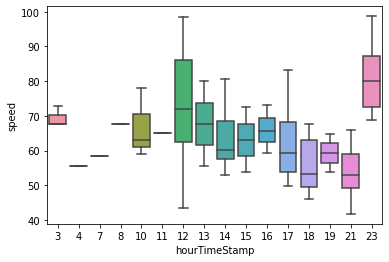

2022-01-05


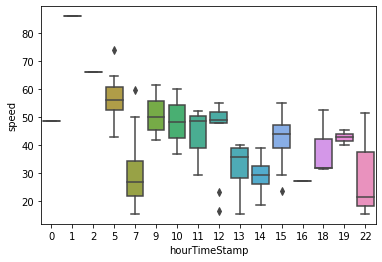

2022-01-06


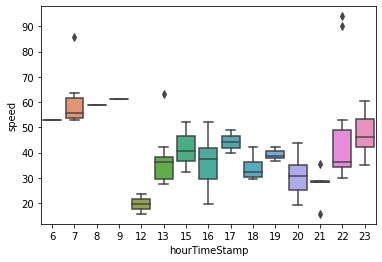

2022-01-07


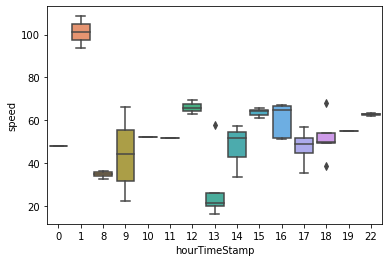

2022-01-08


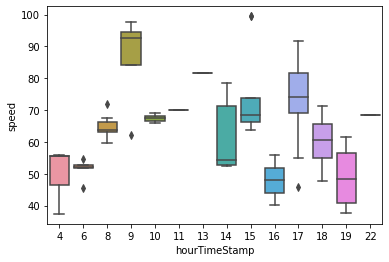

2022-01-11


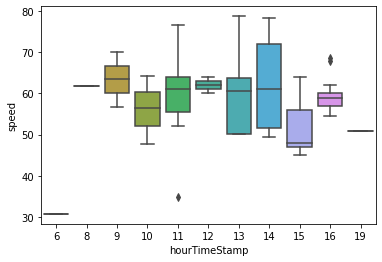

2022-01-12


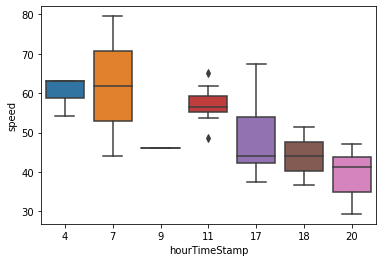

2022-01-15


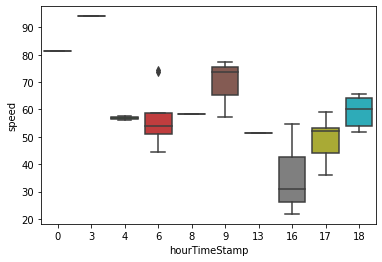

2022-01-22


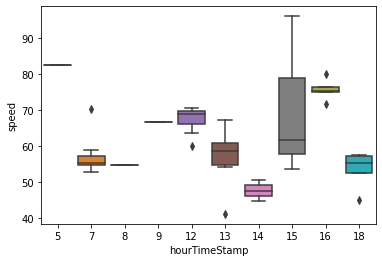

2022-01-24


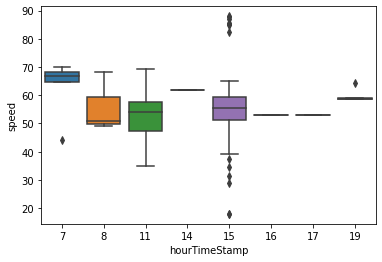

2022-01-27


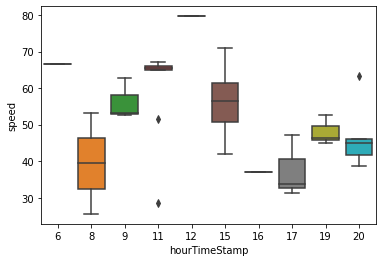

2022-01-28


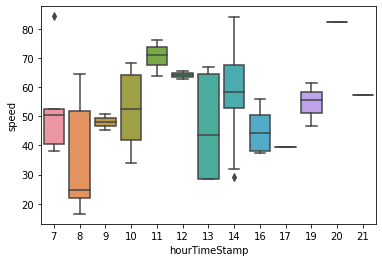

2022-02-12


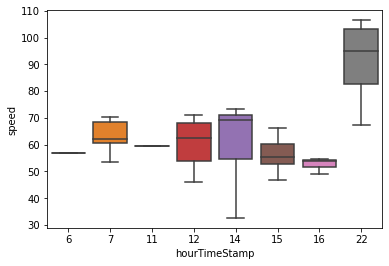

2022-02-23


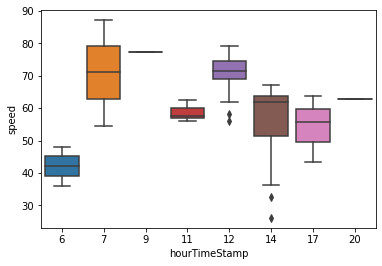

2022-03-10


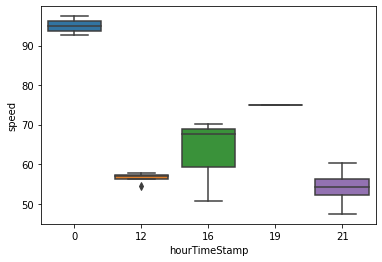

2022-03-20


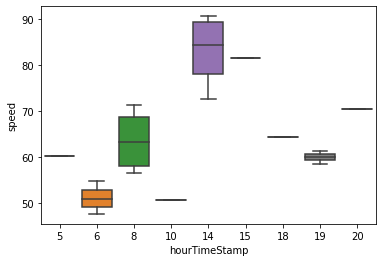

2022-03-25


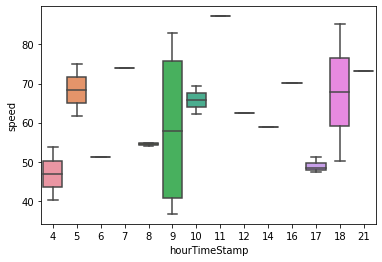

2022-04-09


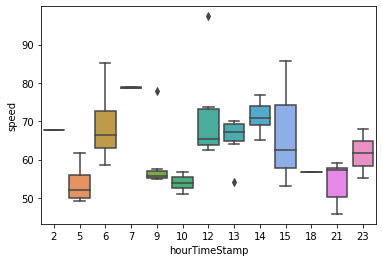

2022-04-10


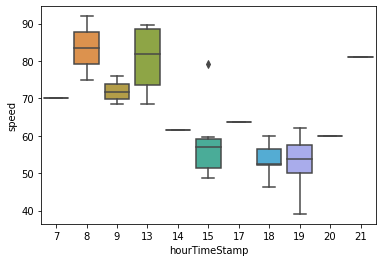

2022-04-12


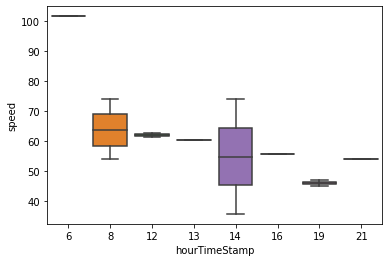

2022-04-13


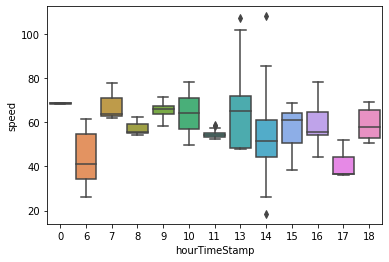

2022-04-17


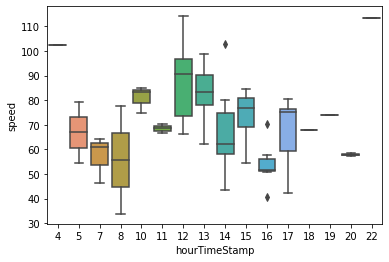

2022-04-18


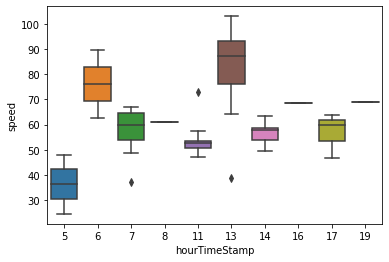

2022-04-19


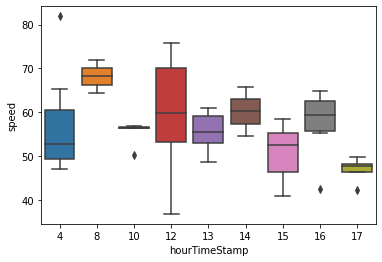

In [32]:
# k = "Bolivar_Valledupar" #2022-04-17
# k = "Briceno_Tunja_Sogamoso" #2022-03-04 , 2022-02-28
k = "Cienaga_San_Roque" #2022-01-05

for i,f in enumerate(fechas_posibles[k]):
    print(f)
    df_k = df[df["Road_right"]  == k]
    counts = df_k['ID_1'].value_counts().rename_axis('unique_values').reset_index(name='counts') # ---> ID: 200
    counts = counts.sort_values(by=['counts'], ascending=False)
    # display(counts)
    best_id = counts.iloc[0,0] #se esta eligieno el segundo mejor [1,0]
    # print(best_id)


    df_road = df_k[df_k["ID_1"] == best_id]    
    
    df_road = df_road[df_road["date_ts"] == f]
    # display(df_road)
        

    plt.figure()
    # sns.color_palette("Spectral", as_cmap=True)
    # diverging_colors = sns.color_palette("RdBu", 24)
    # sns.palplot(diverging_colors)
    sns.boxplot(data=df_road, x="hourTimeStamp", y="speed", dodge=False)
    # plt.yscale("log")
    plt.show()

# `   if i > 10:
#         break`
    
# Bolivar_Valledupar": "Bolivar - Valledupar",
#             "Briceno_Tunja_Sogamoso": "Briceño - Tunja - Sogamoso",
#             "Cienaga_San_Roque": "Cienaga - San Roque"})

Briceno_Tunja_Sogamoso


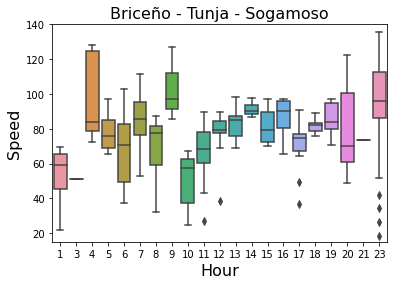

Bolivar_Valledupar


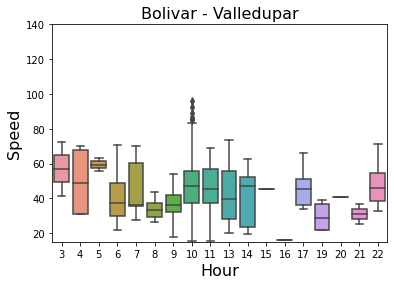

Cienaga_San_Roque


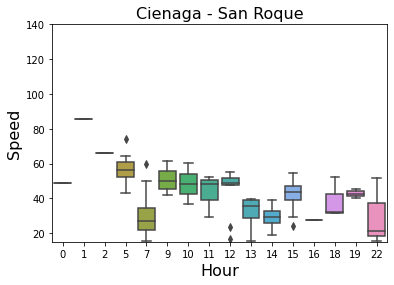

In [34]:
fechas_corridor = {"Bolivar_Valledupar": "2022-04-17", "Briceno_Tunja_Sogamoso" : "2022-02-28", "Cienaga_San_Roque": "2022-01-05"}

for k in df["Road_right"].unique():
    # df_dia = df[]
    print(k)
    df_k = df[df["Road_right"]  == k]
    counts = df_k['ID_1'].value_counts().rename_axis('unique_values').reset_index(name='counts') # ---> ID: 200
    counts = counts.sort_values(by=['counts'], ascending=False)
    # display(counts)
    best_id = counts.iloc[0,0] #se esta eligieno el segundo mejor [1,0]
    # print(best_id)
    
   

    df_road = df_k[df_k["ID_1"] == best_id]    
    
    df_road = df_road[df_road["date_ts"] == fechas_corridor[k]]
    # df_road["count"] = 1
    # display(df_road)
        
    
    plt.figure()
    # sns.color_palette("Spectral", as_cmap=True)
    # diverging_colors = sns.color_palette("RdBu", 24)
    # sns.palplot(diverging_colors)
    sns.boxplot(data=df_road, x="hourTimeStamp", y="speed", dodge=False)
    plt.xlabel("Hour", fontsize=16)
    plt.ylabel("Speed", fontsize=16)
    plt.ylim(15,140)
    plt.title(name[k], fontsize=16)
    plt.savefig("outputs/2022_11_informe/boxplot_{}.png".format(k), dpi=300)
    plt.show()

# counts = df['ID_1'].value_counts().rename_axis('unique_values').reset_index(name='counts') # ---> ID: 200



In [47]:
valid_trips = []
for did in tqdm(df["device_id"].unique()):
    df_id = df[df["device_id"] == did]
    nroads = len(df_id["Road_right"].unique())
    # print()
    if nroads == 1:
        valid_trips.append(did)

  8%|▊         | 1065/13997 [01:13<14:56, 14.42it/s]


KeyboardInterrupt: 

In [4]:
# Users con mas records
counts = df['device_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')
counts

,unique_values,counts
0,c32b34afbfff1c77607adc2d6fb0d3b3eb625ccfb7f841...,21527
1,ef535ea277489e2da6250e45c77bf7cd0b507596baf3f7...,17334
2,e31f211d4e2b5de4e2f1ee0bc47d11bbe945768c9c7d3c...,13328
3,272c6c40ac7d118c9816a6f62f403be83b2959fa8d670b...,11275
4,3d1d468a3e6fdc0864346a3822afc347be1475735f18a2...,9942
...,...,...
13992,acea0d9e6c8668d28d6c52031eb1f5dd00f948235fb6ce...,1
13993,b55cd17fdba1454a6e2d57aa390b84b84120cbdc172560...,1
13994,6a96af63a29da364b40042c9f637ab4000fcc3b8efd494...,1
13995,cd136a1d29832de4925d29370044a3e389a76a3c01d1c4...,1


In [102]:
# Fecha con mas records
counts = df.copy()
counts["counts"] = 1
counts = counts.groupby(["date_ts"]).agg( count = ("counts","sum")).reset_index().sort_values("count",ascending=False)
counts

,date_ts,count
101,2022-04-17,32710
100,2022-04-16,31814
99,2022-04-13,26507
75,2022-03-19,25050
0,2022-01-02,23003
...,...,...
35,2022-02-07,7468
28,2022-01-31,7096
57,2022-03-01,6792
85,2022-03-30,6695


/var/folders/vk/14ym66kj4_d9xkr_w6f6cr7w0000gn/T/ipykernel_40919/3652853261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_r["counts"] = 1
/var/folders/vk/14ym66kj4_d9xkr_w6f6cr7w0000gn/T/ipykernel_40919/3652853261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_r["counts"] = 1
/var/folders/vk/14ym66kj4_d9xkr_w6f6cr7w0000gn/T/ipykernel_40919/3652853261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

[]

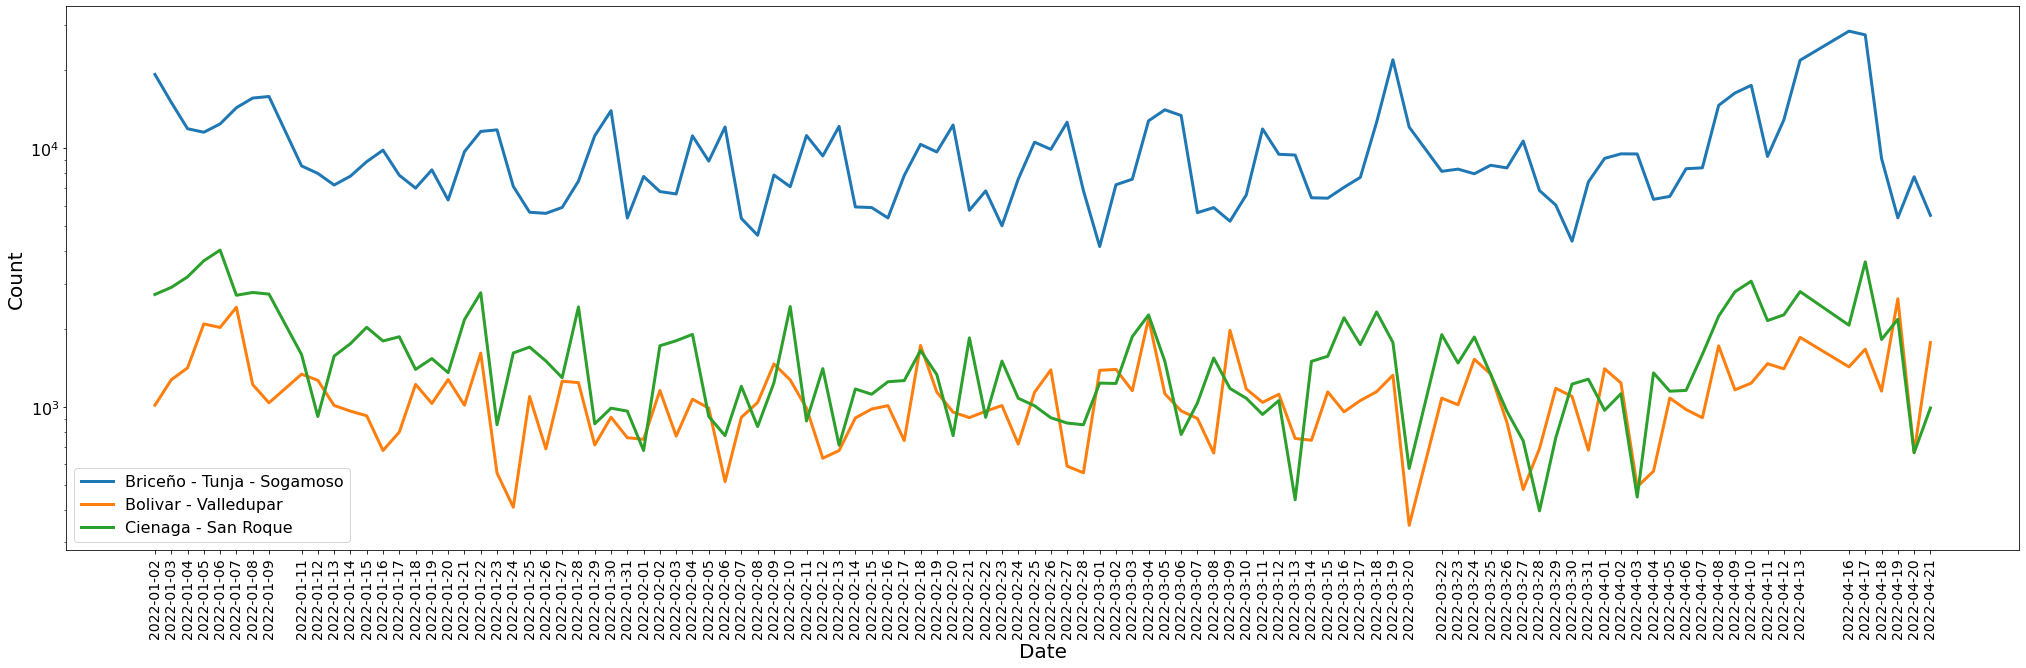

In [141]:
fig, ax = plt.subplots(figsize=(35,10))

counts = df.copy()
for r in df["Road_right"].unique():
    counts_r = counts[counts["Road_right"] == r]
    counts_r["counts"] = 1
    counts_r = counts_r.groupby(["date_ts"]).agg( count = ("counts","sum")).reset_index().sort_values("date_ts",ascending=False)

    xx = counts_r["date_ts"]
    yy = counts_r["count"]
    ax.plot(xx,yy, label = name[r], linewidth = 3)
    
plt.xticks(xx,rotation = 90, fontsize = 14)
plt.yticks(fontsize = 16)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.xlabel("Date", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.yscale("log")    
plt.legend(fontsize = 16)
plt.savefig("outputs/2022_11_informe/counts_date_line_corridors.png",dpi=200, bbox_inches='tight')
plt.plot()

[]

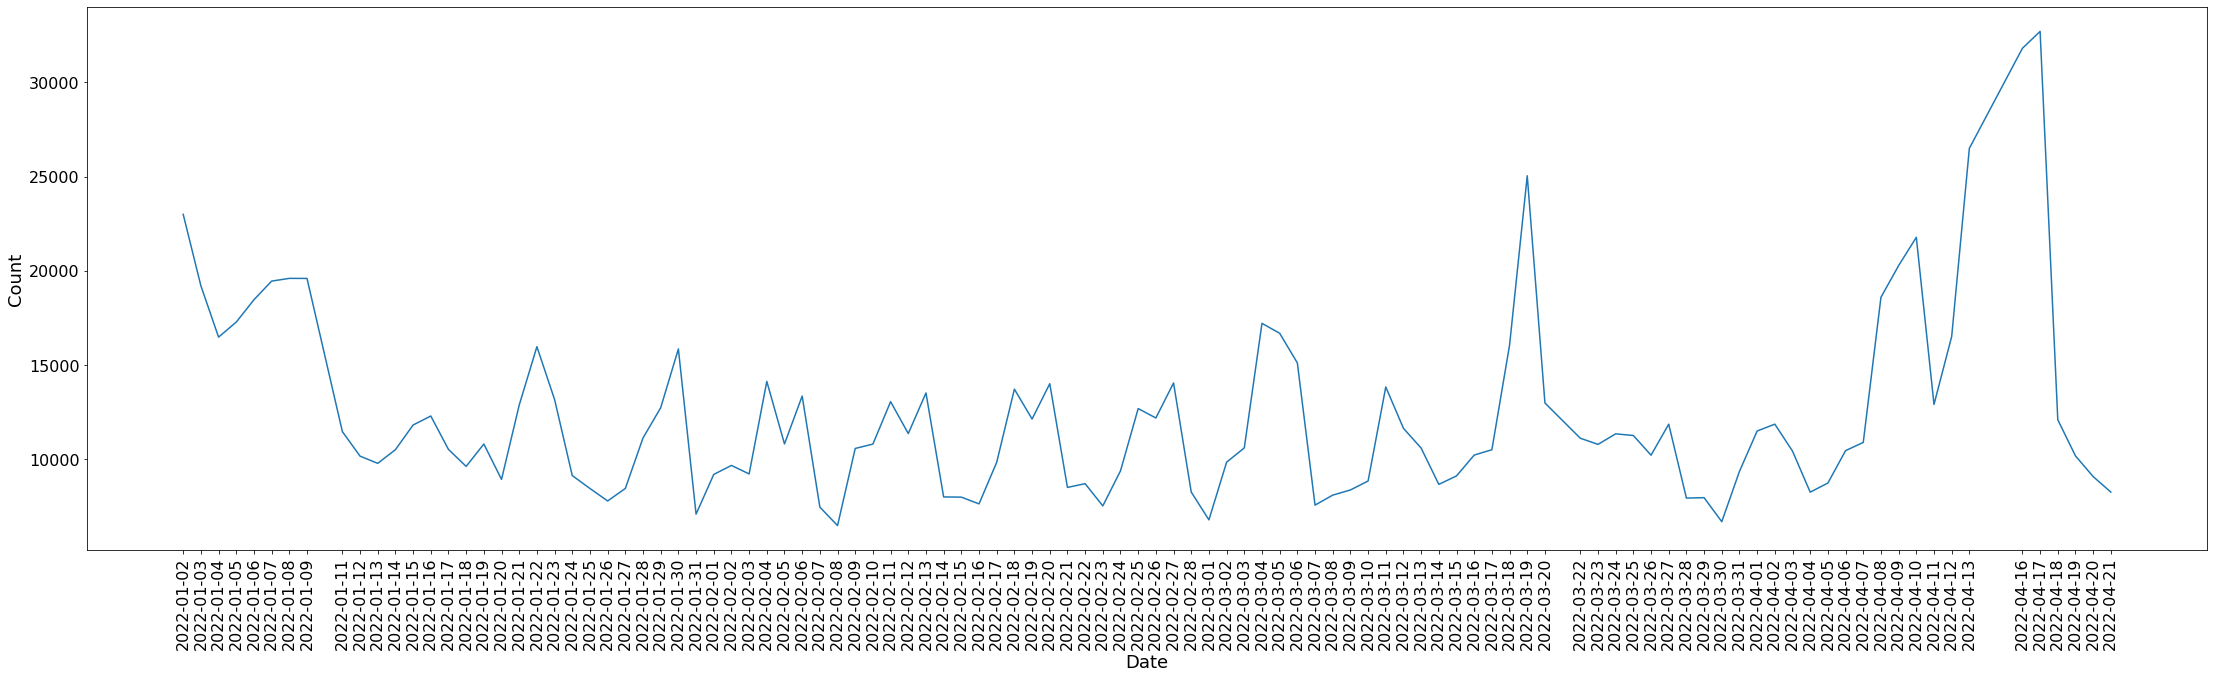

In [143]:
counts = df.copy()
counts["counts"] = 1
counts = counts.groupby(["date_ts"]).agg( count = ("counts","sum")).reset_index().sort_values("date_ts",ascending=False)

xx = counts["date_ts"]
yy = counts["count"]


fig, ax = plt.subplots(figsize=(38,10))
# ax.bar(xx,yy)
ax.plot(xx,yy)
plt.xticks(xx,rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.xlabel("Date", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.savefig("outputs/2022_11_informe/counts_date_line.pdf", bbox_inches='tight')
plt.plot()

In [107]:
# users con mas records en día
counts = df.copy()
counts["counts"] = 1
counts = counts.groupby(["Road_right","device_id","date_ts"]).agg( count = ("counts","sum")).reset_index().sort_values("count",ascending=False)
counts


,Road_right,device_id,date_ts,count
17637,Briceno_Tunja_Sogamoso,4dfabc7bad00e6d04d4a2f2b638b9af058f2693c17c210...,2022-02-25,1388
33408,Briceno_Tunja_Sogamoso,cc4c2eb08475b64118df0c597fb70cac5c5b93097b066f...,2022-04-16,1116
35961,Briceno_Tunja_Sogamoso,e14cbd8d9a13bb7316b6bbea608e220ab3719c3a4fa4f0...,2022-02-12,985
24302,Briceno_Tunja_Sogamoso,85efebbd7d4afec9d62c83f0adfef4ca9f26bf4cd83428...,2022-03-04,978
32092,Briceno_Tunja_Sogamoso,c32b34afbfff1c77607adc2d6fb0d3b3eb625ccfb7f841...,2022-02-11,967
...,...,...,...,...
14458,Briceno_Tunja_Sogamoso,363f7c3a7b9b9f470907db60f0f1e1882d2c1a76779266...,2022-02-05,1
14454,Briceno_Tunja_Sogamoso,3635c347e8778b78e75d059bc4f13836c16c9ba3881673...,2022-04-17,1
14442,Briceno_Tunja_Sogamoso,362195e72b06a22e62287cb93bec98b39997b5fe8a9f21...,2022-04-08,1
14435,Briceno_Tunja_Sogamoso,3608e9a4f6cfa1c0508c6578db5ef98254fe1def1f432a...,2022-04-10,1


In [31]:
counts[counts["Road_right"] == "Bolivar_Valledupar"]

,Road_right,device_id,date_ts,count
3112,Bolivar_Valledupar,64c7bb959c07a72d1cc640f58f893922058d0317f79604...,2022-03-09,670
2630,Bolivar_Valledupar,52f4be9dba9e99c95c96ea6516e758beed059a78c925c7...,2022-04-19,558
7674,Bolivar_Valledupar,fee85bd25f7b90e018452de1a96a15db871e8139cdd5f9...,2022-04-02,543
3289,Bolivar_Valledupar,6e1b83b145dcca49615c33056cab8f234794a1d91cf1a3...,2022-01-22,467
5925,Bolivar_Valledupar,c98fd3522e1f63f98cdf42c778b856f827750a9c9285cd...,2022-01-05,399
...,...,...,...,...
5398,Bolivar_Valledupar,b69419eb693660a83a9e073f37c6add8063d078a2f9329...,2022-01-25,1
5404,Bolivar_Valledupar,b6cadff52a2316dca6a30a8bb42daf8efa296b5d4750bf...,2022-01-03,1
5409,Bolivar_Valledupar,b7480905c6e0b8e25515e09d381e3fb8d57dd364100d03...,2022-02-06,1
5427,Bolivar_Valledupar,b765ae0c96bd4e74f1249a815d7234a440ea71caffaf05...,2022-02-24,1


In [106]:
counts[counts["date_ts"] == "2022-04-17"]

,date_ts,count
101,2022-04-17,32710


User 1:  1f0a6224ae0f329155b4eb35e4a6aae11a10cfe7295aa934d97f0436ebe04be81b9434b441231ce70547006fc5607cd56656e6445bb4dbfecccd09479a2f8b70
User 2:  551687b01ec9fa516b8ada518f1fe80177c8ba49a8b0d360163fd4ee38df547f3ff5af67b187479ce98b9b54fcd44f01229567b95289544769f254a0578d360a
User 3:  d14462dec3fba8562ed565631372ae4eb5e053a3bb64817827e6ca33bd9280c738ec430b86768dad4edeb94a99c6dbe13a5fb30d5063316b770e6864ff992727


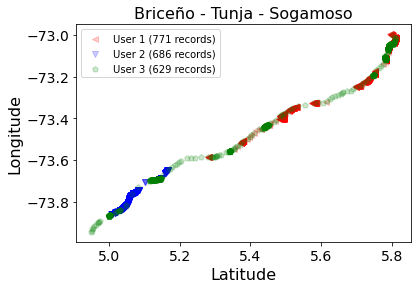

In [129]:
ROAD_NAME = "Briceno_Tunja_Sogamoso"
# Cienaga_San_Roque
# Briceno_Tunja_Sogamoso
# Bolivar_Valledupar

# date_max_count = counts["date_ts"].values[0]
date_max_count = "2022-04-17"
df_counts_by_date = counts[(counts["date_ts"] == date_max_count) & (counts["Road_right"] == ROAD_NAME)]

# date_max_count = "2022-04-17"
# df_counts_by_date = counts[(counts["date_ts"] == date_max_count) & ((counts["Road_right"] == "Cienaga_San_Roque") | (counts["Road_right"] == "Bolivar_Valledupar"))]

# display(df_counts_by_date)

get_flag = True
c = 0
while get_flag:
    df_us1 = df[(df["device_id"] == df_counts_by_date["device_id"].values[c]) & (df["date_ts"] == date_max_count)]
    if len(df_us1["Road_right"].unique()) == 1:
        get_flag = False
        print("User 1: ", df_counts_by_date["device_id"].values[c])
    c += 1

get_flag = True
while get_flag:        
    df_us2 = df[(df["device_id"] == df_counts_by_date["device_id"].values[c]) & (df["date_ts"] == date_max_count)]
    if len(df_us2["Road_right"].unique()) == 1:
        get_flag = False
        print("User 2: ", df_counts_by_date["device_id"].values[c])     
    c += 1
        
get_flag = True
while get_flag:          
    df_us3 = df[(df["device_id"] == df_counts_by_date["device_id"].values[c]) & (df["date_ts"] == date_max_count)]
    if len(df_us3["Road_right"].unique()) == 1:
        get_flag = False
        print("User 3: ", df_counts_by_date["device_id"].values[c]) 
    c+=1    
    # else:
    #     get_flag = False
        


plt.scatter(df_us1.latitude, df_us1.longitude, alpha = 0.2, label = f"User 1 ({len(df_us1)} records)", 
            c = 'r', 
            marker = "<")                        
plt.scatter(df_us2.latitude, df_us2.longitude, alpha = 0.2, label = f"User 2 ({len(df_us2)} records)",
            c = 'b',
            marker = "v")
plt.scatter(df_us3.latitude, df_us3.longitude, alpha = 0.2, label = f"User 3 ({len(df_us3)} records)",
            c = 'g',
            marker = "p")

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.title(name[ROAD_NAME], fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)
plt.ylabel("Longitude", fontsize = 16)
plt.legend()

plt.savefig(f"outputs/2022_11_informe/counts_top_{ROAD_NAME}.pdf", bbox_inches='tight')
plt.show()

# df_us1

# df_us2 = df_seg[(df_seg["device_id"] == q2["device_id"].values[0]) & (df_seg["date_ts"] == date_max_count)]
# df_us3 = df_seg[(df_seg["device_id"] == q1["device_id"].values[0]) & (df_seg["date_ts"] == date_max_count)]


In [109]:
df_us1.to_csv("outputs/2022_11_informe/user1.csv", index = False)

In [124]:
df[(df["device_id"] == "e0f81727c2c93f3ea6d18f660fa89ff70140a500f95ea27a04004b56f20f4b9ebf2bf9b8aee9e455e48cee7560de95d9f07aa90035779cccb7c027f75935bc7f") & (df["date_ts"] == "2022-04-17")]["Road_right"].unique()

array(['Bolivar_Valledupar'], dtype=object)

In [35]:
df_us1

,Unnamed: 0,Unnamed: 0.1,device_id,platform,timestamp,local_location_at,latitude,longitude,iso_region,horizontal_accuracy,...,Road_right,Length,START_X,START_Y,END_X,END_Y,ID_1,Area,location_dt,date_ts
674075,658493,3648,e31f211d4e2b5de4e2f1ee0bc47d11bbe945768c9c7d3c...,AAID,2022-02-25 12:42:37+00:00,2022-02-25 07:42:37,11.001195,-74.21456,CO-MAG,3.8,...,Cienaga_San_Roque,6171.831,-74.215090,11.001896,-74.175485,10.962753,1,44520.346685,2022-02-25,2022-02-25
674081,919657,822,e31f211d4e2b5de4e2f1ee0bc47d11bbe945768c9c7d3c...,AAID,2022-02-25 12:42:39+00:00,2022-02-25 07:42:39,11.001017,-74.21441,CO-MAG,3.8,...,Cienaga_San_Roque,6171.831,-74.215090,11.001896,-74.175485,10.962753,1,44520.346685,2022-02-25,2022-02-25
674087,1163864,237,e31f211d4e2b5de4e2f1ee0bc47d11bbe945768c9c7d3c...,AAID,2022-02-25 12:42:33+00:00,2022-02-25 07:42:33,11.001547,-74.21484,CO-MAG,3.8,...,Cienaga_San_Roque,6171.831,-74.215090,11.001896,-74.175485,10.962753,1,44520.346685,2022-02-25,2022-02-25
674088,1226076,2364,e31f211d4e2b5de4e2f1ee0bc47d11bbe945768c9c7d3c...,AAID,2022-02-25 12:43:15+00:00,2022-02-25 07:43:15,10.997728,-74.21167,CO-MAG,3.8,...,Cienaga_San_Roque,6171.831,-74.215090,11.001896,-74.175485,10.962753,1,44520.346685,2022-02-25,2022-02-25
674089,1244566,3486,e31f211d4e2b5de4e2f1ee0bc47d11bbe945768c9c7d3c...,AAID,2022-02-25 12:43:17+00:00,2022-02-25 07:43:17,10.997578,-74.21152,CO-MAG,3.8,...,Cienaga_San_Roque,6171.831,-74.215090,11.001896,-74.175485,10.962753,1,44520.346685,2022-02-25,2022-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682831,1338672,2619,e31f211d4e2b5de4e2f1ee0bc47d11bbe945768c9c7d3c...,AAID,2022-02-25 19:21:52+00:00,2022-02-25 14:21:52,10.835584,-74.12315,CO-MAG,5.8,...,Cienaga_San_Roque,1679.012,-74.128552,10.843078,-74.120950,10.830182,30,11375.786790,2022-02-25,2022-02-25
682832,1552635,2038,e31f211d4e2b5de4e2f1ee0bc47d11bbe945768c9c7d3c...,AAID,2022-02-25 19:26:25+00:00,2022-02-25 14:26:25,10.830430,-74.12103,CO-MAG,4.5,...,Cienaga_San_Roque,1679.012,-74.128552,10.843078,-74.120950,10.830182,30,11375.786790,2022-02-25,2022-02-25
682833,1636013,2198,e31f211d4e2b5de4e2f1ee0bc47d11bbe945768c9c7d3c...,AAID,2022-02-25 19:26:26+00:00,2022-02-25 14:26:26,10.830332,-74.12100,CO-MAG,4.7,...,Cienaga_San_Roque,1679.012,-74.128552,10.843078,-74.120950,10.830182,30,11375.786790,2022-02-25,2022-02-25
682834,1820630,4355,e31f211d4e2b5de4e2f1ee0bc47d11bbe945768c9c7d3c...,AAID,2022-02-25 19:26:25+00:00,2022-02-25 14:26:25,10.831136,-74.12119,CO-MAG,4.0,...,Cienaga_San_Roque,1679.012,-74.128552,10.843078,-74.120950,10.830182,30,11375.786790,2022-02-25,2022-02-25


In [21]:
counts["Road_right"].unique()

array(['Briceno_Tunja_Sogamoso', 'Cienaga_San_Roque',
       'Bolivar_Valledupar'], dtype=object)

In [14]:
def get_coordinates_top(df_counts,df,Road_right):
    df_seg = df[df["Road_right"] == Road_right]
    df_road = df_counts[df_counts["Road_right"] == Road_right].sort_values("count",ascending=False) # counts segmentado por carretera y por dia

    date_max_count = df_road["date_ts"].values[0] # fecha del user con mas records en un dia 
    df_us1 = df_seg[(df_seg["device_id"] == df_road["device_id"].values[0]) & (df_seg["date_ts"] == date_max_count)]
    # print("df_us1"), display(df_us1)
    
    df_us1_counts = df_road[df_road["date_ts"] == date_max_count] #counts solo para el dias del user con mas records
    # print("df_us1_counts"), display(df_us1_counts)
    
    vv1, vv2 = df_us1_counts["count"].quantile([0.91,0.98]).astype(int).values
    print(vv1, vv2)
    q1 = df_us1_counts[df_us1_counts["count"] < vv1]
    q2 = df_us1_counts[(df_us1_counts["count"] > vv1) & (df_us1_counts["count"] < vv2)]
    # print("q1"), display(q1)
    # print("q1"), display(q2)
    
    df_us2 = df_seg[(df_seg["device_id"] == q2["device_id"].values[0]) & (df_seg["date_ts"] == date_max_count)]
    df_us3 = df_seg[(df_seg["device_id"] == q1["device_id"].values[0]) & (df_seg["date_ts"] == date_max_count)]
    
    # print("df_us2"), display(df_us2)
    # print("df_us3"), display(df_us3)
    
    return df_us1["latitude"].values, df_us1["longitude"].values, df_us2["latitude"].values, df_us2["longitude"].values, df_us3["latitude"].values, df_us3["longitude"].values
    


42 147


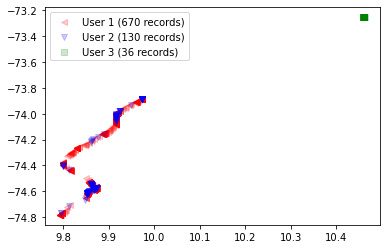

In [15]:
us1_lat, us1_lon, us2_lat, us2_lon, us3_lat, us3_lon = get_coordinates_top(df_counts = counts, df = df, Road_right = "Bolivar_Valledupar")

plt.scatter(us1_lat, us1_lon, alpha = 0.2, label = f"User 1 ({len(us1_lat)} records)", 
            c = 'r', 
            marker = "<")                        
plt.scatter(us2_lat, us2_lon, alpha = 0.2, label = f"User 2 ({len(us2_lat)} records)",
            c = 'b',
            marker = "v")
plt.scatter(us3_lat, us3_lon, alpha = 0.2, label = f"User 3 ({len(us3_lat)} records)",
            c = 'g',
            marker = "s")

plt.legend()
plt.show()

111 218


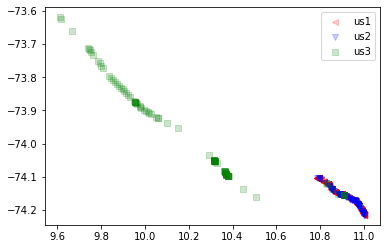

In [17]:
us1_lat, us1_lon, us2_lat, us2_lon, us3_lat, us3_lon = get_coordinates_top(df_counts = counts, df = df, Road_right = "Cienaga_San_Roque")

plt.scatter(us1_lat, us1_lon, alpha = 0.2, label = "us1", 
            c = 'r', 
            marker = "<")                        
plt.scatter(us2_lat, us2_lon, alpha = 0.2, label = "us2",
            c = 'b',
            marker = "v")
plt.scatter(us3_lat, us3_lon, alpha = 0.2, label = "us3",
            c = 'g',
            marker = "s")

plt.legend()
plt.show()

80 174


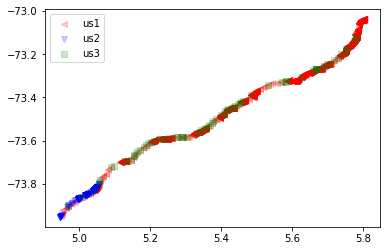

In [18]:
us1_lat, us1_lon, us2_lat, us2_lon, us3_lat, us3_lon = get_coordinates_top(df_counts = counts, df = df, Road_right = "Briceno_Tunja_Sogamoso")

plt.scatter(us1_lat, us1_lon, alpha = 0.2, label = "us1", 
            c = 'r', 
            marker = "<")                        
plt.scatter(us2_lat, us2_lon, alpha = 0.2, label = "us2",
            c = 'b',
            marker = "v")
plt.scatter(us3_lat, us3_lon, alpha = 0.2, label = "us3",
            c = 'g',
            marker = "s")

plt.legend()
plt.show()

In [77]:
df_bolVll = counts[counts["Road_right"] == "Bolivar_Valledupar"].sort_values("count",ascending=False)
df_bolVll_ids = df_bolVll["device_id"].values

vv1, vv2 = df_bolVll["count"].quantile([0.8,0.9]).astype(int).values
q1 = df_bolVll[(df_bolVll["count"] > vv1) & (df_bolVll["count"] < vv2)]

us1 = df[(df["device_id"] == q1["device_id"].values[1]) & (df["date_ts"] == q1["date_ts"].values[1])]
us1

,Unnamed: 0,Unnamed: 0.1,device_id,platform,timestamp,local_location_at,latitude,longitude,iso_region,horizontal_accuracy,...,Road_right,Length,START_X,START_Y,END_X,END_Y,ID_1,Area,location_dt,date_ts
1212943,854325,1499,cc2e3ccb00df7bbb7ec09290ef531c7c3e3d381e10f346...,IDFA,2022-01-08 21:58:24+00:00,2022-01-08 16:58:24,10.608923,-74.168400,CO-MAG,5.8,...,Cienaga_San_Roque,2667.313,-74.169907,10.591385,-74.167901,10.615416,86,20099.001616,2022-01-08,2022-01-08
1214304,1708417,2806,cc2e3ccb00df7bbb7ec09290ef531c7c3e3d381e10f346...,IDFA,2022-01-08 21:43:29+00:00,2022-01-08 16:43:29,10.473845,-74.155920,CO-MAG,4.7,...,Cienaga_San_Roque,3893.504,-74.141612,10.453573,-74.161980,10.482425,82,26077.373098,2022-01-08,2022-01-08
1218384,680156,2792,cc2e3ccb00df7bbb7ec09290ef531c7c3e3d381e10f346...,IDFA,2022-01-08 21:40:28+00:00,2022-01-08 16:40:28,10.435015,-74.130700,CO-MAG,4.5,...,Cienaga_San_Roque,3623.490,-74.125195,10.425142,-74.141604,10.453562,81,23716.071550,2022-01-08,2022-01-08
1223959,20089,2220,cc2e3ccb00df7bbb7ec09290ef531c7c3e3d381e10f346...,IDFA,2022-01-08 19:57:44+00:00,2022-01-08 14:57:44,10.454604,-73.257850,CO-CES,5.9,...,Bolivar_Valledupar,3681.903,-73.253981,10.461624,-73.271040,10.433525,280,50633.075221,2022-01-08,2022-01-08
1223967,98322,2031,cc2e3ccb00df7bbb7ec09290ef531c7c3e3d381e10f346...,IDFA,2022-01-08 20:00:54+00:00,2022-01-08 15:00:54,10.435530,-73.269450,CO-CES,4.9,...,Bolivar_Valledupar,3681.903,-73.253981,10.461624,-73.271040,10.433525,280,50633.075221,2022-01-08,2022-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230563,335573,2274,cc2e3ccb00df7bbb7ec09290ef531c7c3e3d381e10f346...,IDFA,2022-01-08 20:25:49+00:00,2022-01-08 15:25:49,10.214960,-73.510740,CO-CES,4.6,...,Bolivar_Valledupar,5441.826,-73.547117,10.204127,-73.500710,10.218461,233,45463.891090,2022-01-08,2022-01-08
1230567,1632074,410,cc2e3ccb00df7bbb7ec09290ef531c7c3e3d381e10f346...,IDFA,2022-01-08 20:27:11+00:00,2022-01-08 15:27:11,10.210014,-73.529250,CO-CES,4.7,...,Bolivar_Valledupar,5441.826,-73.547117,10.204127,-73.500710,10.218461,233,45463.891090,2022-01-08,2022-01-08
1230708,478546,1916,cc2e3ccb00df7bbb7ec09290ef531c7c3e3d381e10f346...,IDFA,2022-01-08 20:20:59+00:00,2022-01-08 15:20:59,10.237667,-73.465410,CO-CES,4.5,...,Bolivar_Valledupar,4487.803,-73.445596,10.249530,-73.480704,10.229834,277,39425.584221,2022-01-08,2022-01-08
1230712,1253971,1774,cc2e3ccb00df7bbb7ec09290ef531c7c3e3d381e10f346...,IDFA,2022-01-08 20:20:14+00:00,2022-01-08 15:20:14,10.245545,-73.453445,CO-CES,4.6,...,Bolivar_Valledupar,4487.803,-73.445596,10.249530,-73.480704,10.229834,277,39425.584221,2022-01-08,2022-01-08


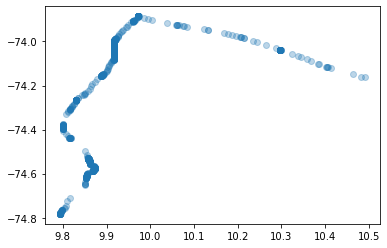

In [57]:
df_bolVll_us1 = df[(df["device_id"] == df_bolVll_ids[0]) & (df["date_ts"] == df_bolVll["date_ts"].values[0])]
df_bolVll_us2 = df[(df["device_id"] == df_bolVll_ids[1]) & (df["date_ts"] == df_bolVll["date_ts"].values[1])]
df_bolVll_us3 = df[(df["device_id"] == df_bolVll_ids[2]) & (df["date_ts"] == df_bolVll["date_ts"].values[2])]

plt.scatter(df_bolVll_us1["latitude"],df_bolVll_us1["longitude"], alpha = 0.3)
# plt.scatter(df_bolVll_us2["latitude"],df_bolVll_us2["longitude"], alpha = 0.3)
# plt.scatter(df_bolVll_us3["latitude"],df_bolVll_us3["longitude"], alpha = 0.4)

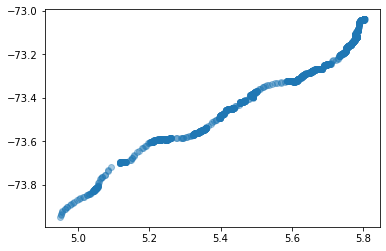

In [58]:
df_briTun = counts[counts["Road_right"] == "Briceno_Tunja_Sogamoso"].sort_values("count",ascending=False)
df_briTun_ids = df_briTun["device_id"].values

df_briTun_us1 = df[(df["device_id"] == df_briTun_ids[0]) & (df["date_ts"] == df_briTun["date_ts"].values[0])]

plt.scatter(df_briTun_us1["latitude"],df_briTun_us1["longitude"], alpha = 0.4)

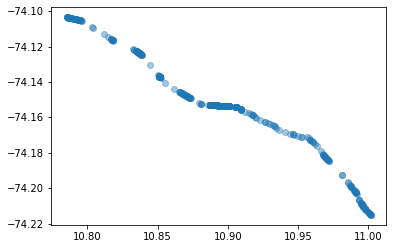

In [60]:
df_cieSR = counts[counts["Road_right"] == "Cienaga_San_Roque"].sort_values("count",ascending=False)
df_cieSR_ids = df_cieSR["device_id"].values

df_cieSR_us1 = df[(df["device_id"] == df_cieSR_ids[0]) & (df["date_ts"] == df_cieSR["date_ts"].values[0])]

plt.scatter(df_cieSR_us1["latitude"],df_cieSR_us1["longitude"], alpha = 0.4)

In [47]:
df["Road_right"].unique()

array(['Briceno_Tunja_Sogamoso', 'Bolivar_Valledupar',
       'Cienaga_San_Roque'], dtype=object)

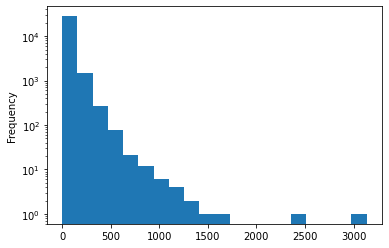

In [21]:
counts["count"].plot.hist(bins=20)
plt.yscale("log")
plt.show()